# Final Project : BUAN6342 - NLP

# Sentiment Analysis and Topic Modeling on Trip Advisor Hotel Reviews


# **Explanatory Data Analysis**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Load and display the first few rows of the dataset
reviews = pd.read_csv('tripadvisor_hotel_reviews.csv')
reviews.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [2]:
# Display information about the dataset including the data type of each column
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [3]:
# Check for missing values in the dataset
reviews.isna().sum()

Review    0
Rating    0
dtype: int64

In [4]:
# Check for duplicated entries in the dataset
reviews.duplicated().sum()

0

In [5]:
# Get the total number of reviews in the dataset
len(reviews)

20491

In [6]:
# Statistical summary of the ratings
reviews['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [7]:
# Count the occurrences of each rating
reviews["Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import itertools
import re

Text(0.5, 1.0, 'Distribution of ratings')

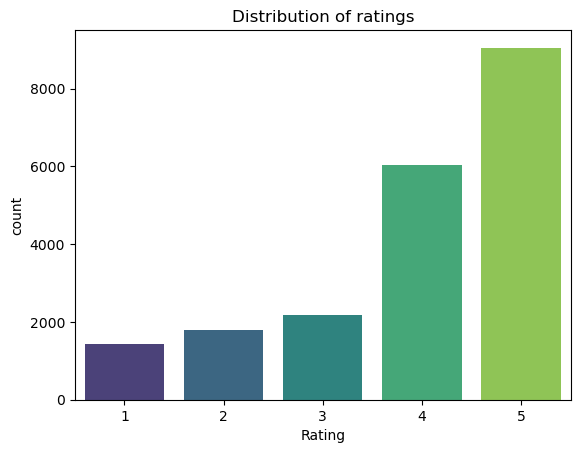

In [9]:
# Plot the distribution of ratings
sns.countplot(data=reviews, x="Rating", palette="viridis").set_title("Distribution of ratings")

In [10]:
# Add a new column for the length of each review
reviews["Length"] = reviews["Review"].apply(len)
reviews.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...       4     593
1  ok nothing special charge diamond member hilto...       2    1689
2  nice rooms not 4* experience hotel monaco seat...       3    1427
3  unique, great stay, wonderful time hotel monac...       5     600
4  great stay great stay, went seahawk game aweso...       5    1281

/Users/afsaruddinmohammed/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


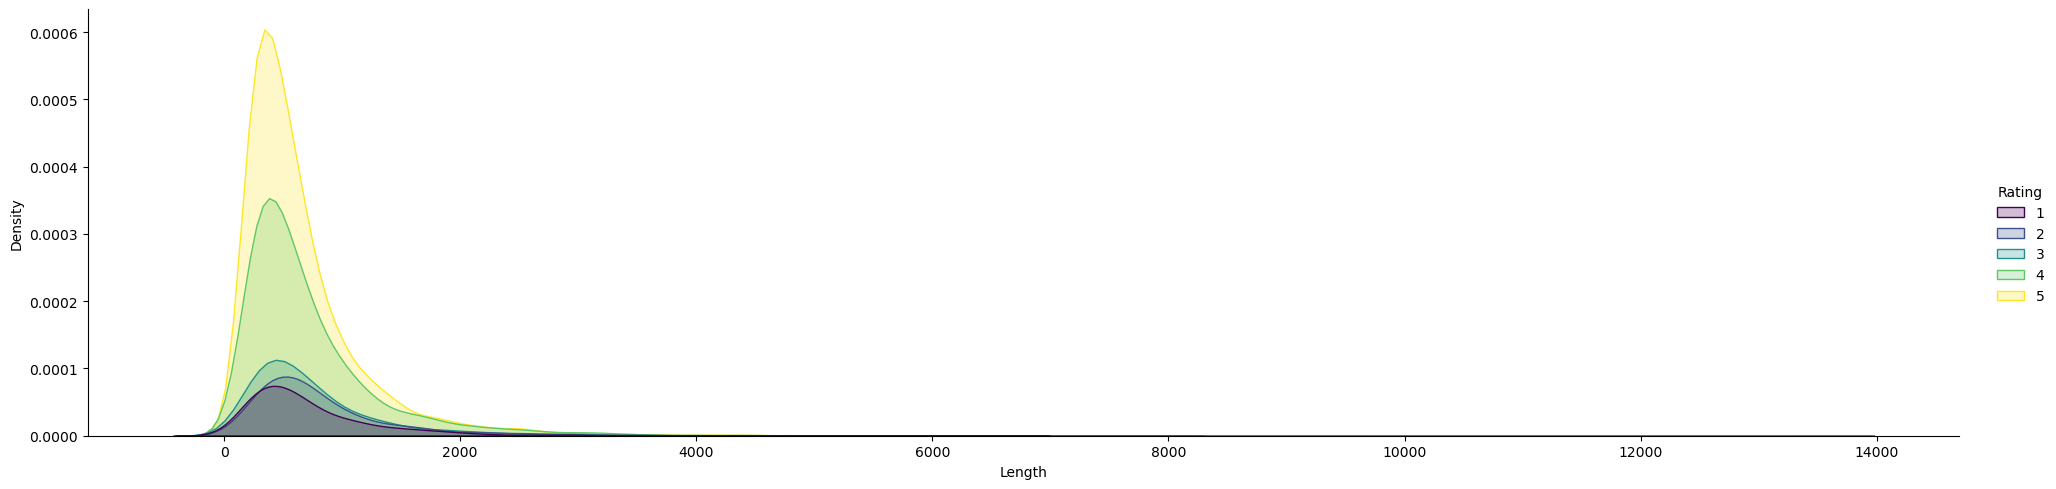

In [11]:
# Plot the distribution of review lengths
sns.displot(data=reviews, x="Length", hue="Rating", palette="viridis", kind="kde", fill=True, aspect=4)

In [12]:
# Add a new column for the number of words in each review
reviews["Length in words"] = reviews["Review"].str.split().apply(len)
reviews.head()

Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...       4     593   
1  ok nothing special charge diamond member hilto...       2    1689   
2  nice rooms not 4* experience hotel monaco seat...       3    1427   
3  unique, great stay, wonderful time hotel monac...       5     600   
4  great stay great stay, went seahawk game aweso...       5    1281   

   Length in words  
0               87  
1              250  
2              217  
3               89  
4              191

/Users/afsaruddinmohammed/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


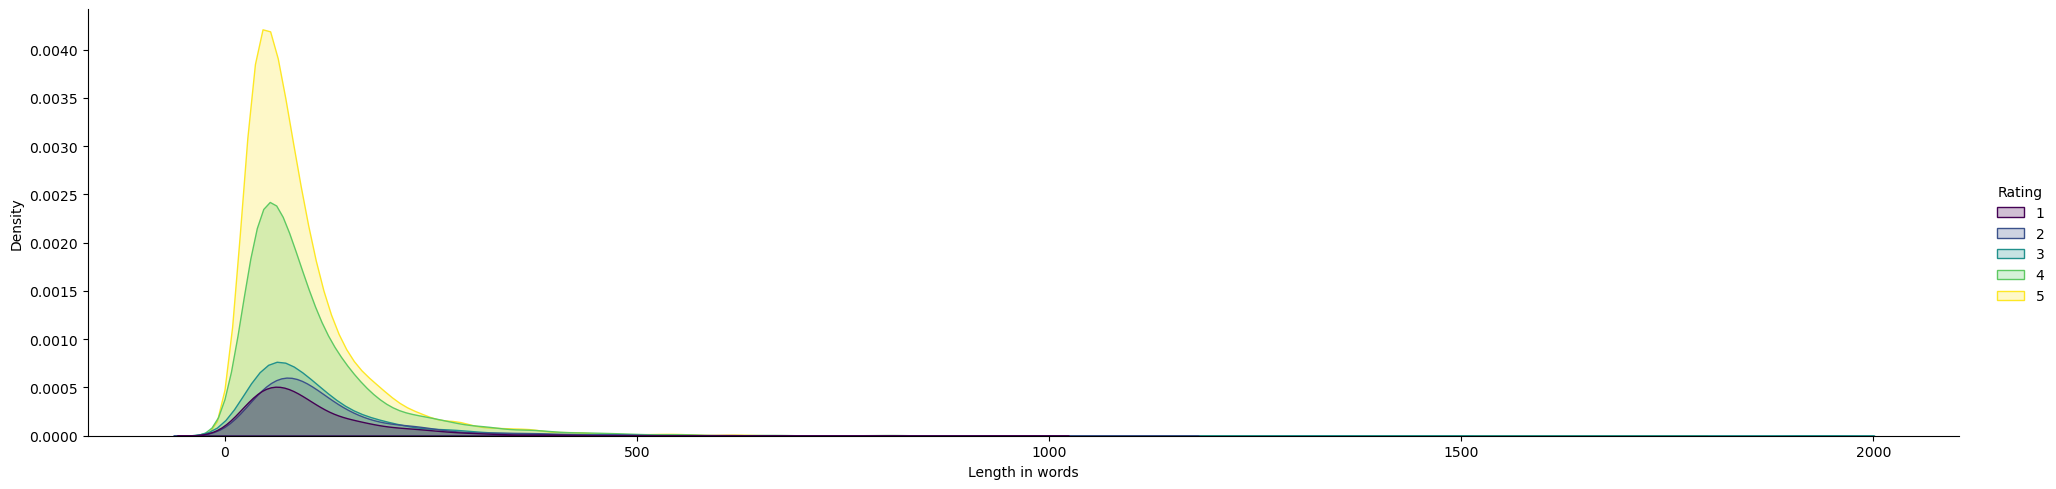

In [13]:
# Plot the distribution of word counts in reviews
sns.displot(data=reviews, x="Length in words", hue="Rating", palette="viridis", kind="kde", fill=True, aspect=4)


In [14]:
from wordcloud import WordCloud

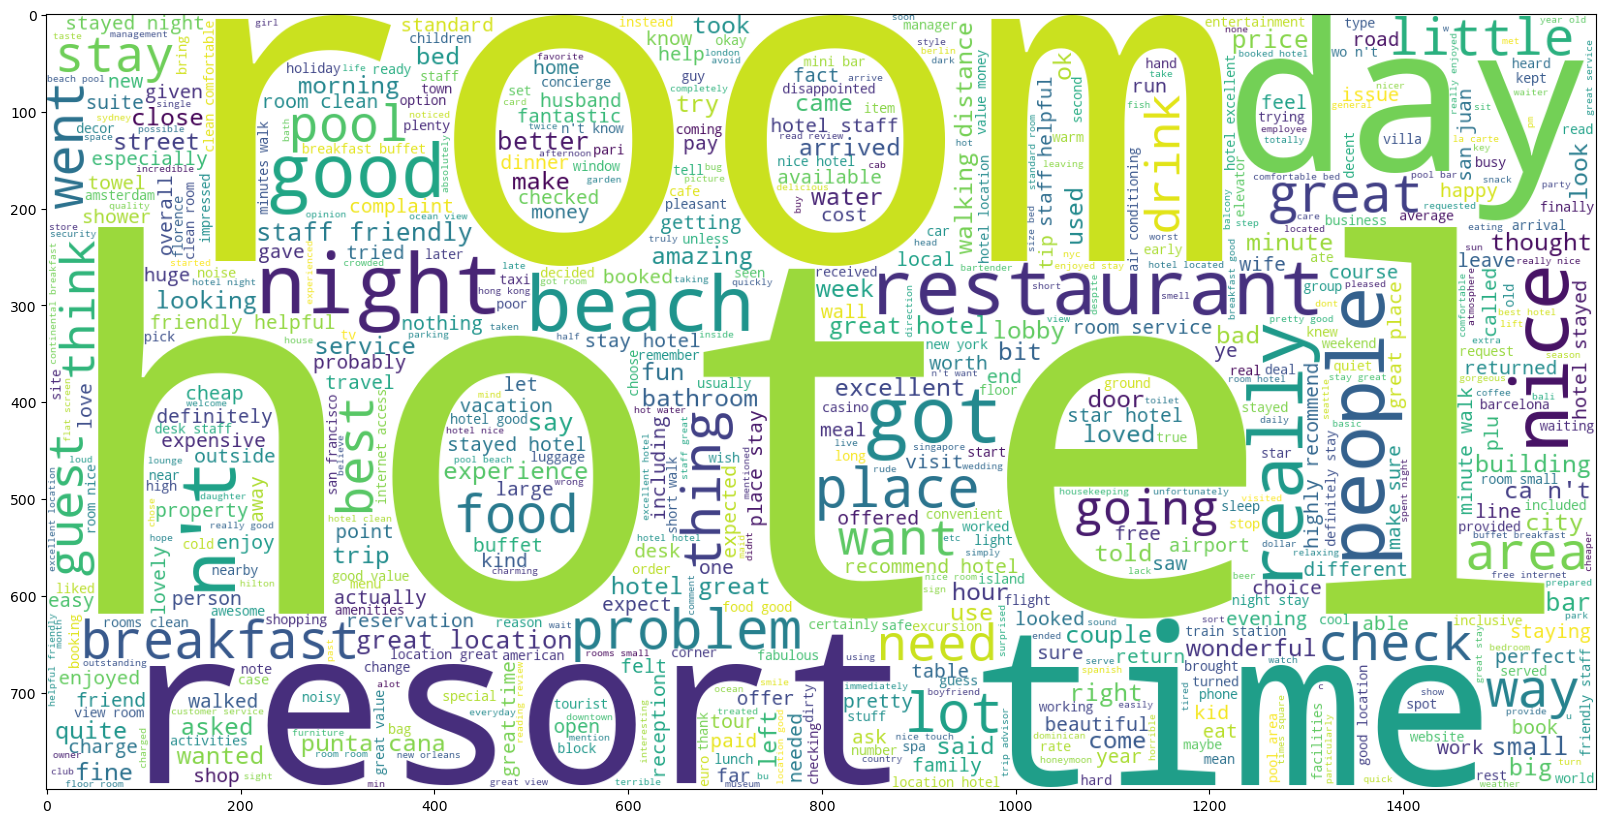

In [15]:
# Create and display a word cloud of the review texts
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10, height=800, width=1600,
               background_color="white", colormap="viridis").generate(" ".join(reviews["Review"]))

plt.imshow(wc)


In [16]:
from collections import Counter

In [17]:
# Count the most common words in the reviews
texts = reviews["Review"]
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    x.append(word)
    y.append(count)

# Visualizing the most common words in the reviews
fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

# **Data Preprocessing**

In [18]:
# Importing libraries for data preprocessing and NLP
# Note: The '!' syntax is used to run shell commands in Jupyter notebooks. It installs the required packages.

import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import gensim # representing documents as semantic vectors

!pip install nltk # package for NLP
import nltk 

!pip install wordcloud # for wordcloud

In [19]:
from nltk import pos_tag # Part-of-Speech (POS) tagging
from nltk.stem import WordNetLemmatizer # lemmatize a word
from nltk.stem.porter import PorterStemmer # Information Retrieval
from nltk.tokenize import word_tokenize # splits sentence into words 
from nltk.tokenize import WhitespaceTokenizer # splits on and discards only whitespace characters
from nltk.corpus import wordnet # large lexical database of English words
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analyzer

# Downloading necessary datasets from nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afsaruddinmohammed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/afsaruddinmohammed/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/afsaruddinmohammed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/afsaruddinmohammed/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/afsaruddinmohammed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
from matplotlib.cm import ScalarMappable # for colormap 
from matplotlib.lines import Line2D # line segment in (x,y) coordinate space
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # give our figure extra personalities
from textwrap import wrap # modifying the behavior of functions. 
from wordcloud import WordCloud # to visualize text
from sklearn.feature_extraction.text import TfidfVectorizer # converts a collection of raw documents into a matrix
from gensim.test.utils import common_texts # training corpus
from gensim.models.doc2vec import Doc2Vec, TaggedDocument #  representing documents as a vector
from PIL import Image # import image

# For Machine Learning Model
from sklearn import preprocessing # utility functions
from sklearn.impute import SimpleImputer # replace missing values
from sklearn.ensemble import RandomForestClassifier # learning algorithm Random Forest
from sklearn.linear_model import LogisticRegression # learning algorithm Logistic Regression
from sklearn.model_selection import train_test_split # create training and test data
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score, recall_score
from sklearn import tree # for modeling
from sklearn.metrics import classification_report # for classification report

In [21]:
# Loading the dataset
reviews = pd.read_csv('tripadvisor_hotel_reviews.csv')
reviews['Label'] = reviews.Rating >3

In [22]:
reviews.head()

Review  Rating  Label
0  nice hotel expensive parking got good deal sta...       4   True
1  ok nothing special charge diamond member hilto...       2  False
2  nice rooms not 4* experience hotel monaco seat...       3  False
3  unique, great stay, wonderful time hotel monac...       5   True
4  great stay great stay, went seahawk game aweso...       5   True

In [23]:
# Checking for blank reviews
blanks = []  # start with an empty list

for i,rv,rt,lb in reviews.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
# Preprocessing steps
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# Download stopwords and VADER lexicon from NLTK
nltk.download('stopwords')
nltk.download('vader_lexicon')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afsaruddinmohammed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/afsaruddinmohammed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# Function to get the WordNet POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [27]:
# Function to clean text
def clean_text(text):
    # remove \t
    text = text.replace('\t', '')
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = ' '.join(text)
    return(text)
# Apply clean_text function

reviews['Clean_Review'] = reviews['Review'].apply(lambda x: clean_text(x))
reviews.head()

Review  Rating  Label  \
0  nice hotel expensive parking got good deal sta...       4   True   
1  ok nothing special charge diamond member hilto...       2  False   
2  nice rooms not 4* experience hotel monaco seat...       3  False   
3  unique, great stay, wonderful time hotel monac...       5   True   
4  great stay great stay, went seahawk game aweso...       5   True   

                                        Clean_Review  
0  nice hotel expensive parking get good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room not experience hotel monaco seattle ...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay go seahawk game awesome ...

In [28]:
# Function to remove stopwords from text
def preprocess_text(text):
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the preprocessing function
reviews['cleaned_review'] = reviews['Clean_Review'].apply(preprocess_text)
reviews.head()

Review  Rating  Label  \
0  nice hotel expensive parking got good deal sta...       4   True   
1  ok nothing special charge diamond member hilto...       2  False   
2  nice rooms not 4* experience hotel monaco seat...       3  False   
3  unique, great stay, wonderful time hotel monac...       5   True   
4  great stay great stay, went seahawk game aweso...       5   True   

                                        Clean_Review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room not experience hotel monaco seattle ...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                      cleaned_review  
0  nice hotel expensive parking get good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room experience hotel monaco seattle good...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay go seahawk game awesome ...

In [29]:
# Encode labels as 'pos' or 'neg'
reviews['Label'].value_counts()

Label
True     15093
False     5398
Name: count, dtype: int64

In [30]:
# reviews['Label'] = reviews['Label'].astype(int)
reviews = reviews.replace({True: 'pos', False: 'neg'})

In [31]:
reviews.dtypes

Review            object
Rating             int64
Label             object
Clean_Review      object
cleaned_review    object
dtype: object

In [32]:
reviews.head()

Review  Rating Label  \
0  nice hotel expensive parking got good deal sta...       4   pos   
1  ok nothing special charge diamond member hilto...       2   neg   
2  nice rooms not 4* experience hotel monaco seat...       3   neg   
3  unique, great stay, wonderful time hotel monac...       5   pos   
4  great stay great stay, went seahawk game aweso...       5   pos   

                                        Clean_Review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room not experience hotel monaco seattle ...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                      cleaned_review  
0  nice hotel expensive parking get good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room experience hotel monaco seattle good...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay go seahawk game awesome ...

# **Sentiment Analysis**

In [33]:
# Initialize Sentiment Intensity Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

In [34]:
# Example of obtaining polarity scores
SIA.polarity_scores(reviews.loc[0]['cleaned_review'])

{'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'compound': 0.9808}

In [35]:
reviews.loc[0]['Label']

'pos'

In [36]:
# adding Sentiment Intensity scores to dataframe
reviews['Scores'] = reviews['cleaned_review'].apply(lambda Review: SIA.polarity_scores(Review))

reviews.head()

Review  Rating Label  \
0  nice hotel expensive parking got good deal sta...       4   pos   
1  ok nothing special charge diamond member hilto...       2   neg   
2  nice rooms not 4* experience hotel monaco seat...       3   neg   
3  unique, great stay, wonderful time hotel monac...       5   pos   
4  great stay great stay, went seahawk game aweso...       5   pos   

                                        Clean_Review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room not experience hotel monaco seattle ...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                      cleaned_review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room experience hotel monaco seattle good...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                              Scores  
0  {'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'co...  
1  {'neg': 0.063, 'neu': 0.687, 'pos': 0.25, 'com...  
2  {'neg': 0.053, 'neu': 0.706, 'pos': 0.241, 'co...  
3  {'neg': 0.044, 'neu': 0.557, 'pos': 0.398, 'co...  
4  {'neg': 0.099, 'neu': 0.639, 'pos': 0.262, 'co...

In [37]:
# Adding compound scores for sentiment analysis to the dataframe
reviews['compound']  = reviews['Scores'].apply(lambda score_dict: score_dict['compound'])

reviews.head()

Review  Rating Label  \
0  nice hotel expensive parking got good deal sta...       4   pos   
1  ok nothing special charge diamond member hilto...       2   neg   
2  nice rooms not 4* experience hotel monaco seat...       3   neg   
3  unique, great stay, wonderful time hotel monac...       5   pos   
4  great stay great stay, went seahawk game aweso...       5   pos   

                                        Clean_Review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room not experience hotel monaco seattle ...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                      cleaned_review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room experience hotel monaco seattle good...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                              Scores  compound  
0  {'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'co...    0.9808  
1  {'neg': 0.063, 'neu': 0.687, 'pos': 0.25, 'com...    0.9945  
2  {'neg': 0.053, 'neu': 0.706, 'pos': 0.241, 'co...    0.9925  
3  {'neg': 0.044, 'neu': 0.557, 'pos': 0.398, 'co...    0.9919  
4  {'neg': 0.099, 'neu': 0.639, 'pos': 0.262, 'co...    0.9914

In [38]:
# Classifying reviews as positive or negative based on the compound score
reviews['comp_score'] = reviews['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

reviews.head()

Review  Rating Label  \
0  nice hotel expensive parking got good deal sta...       4   pos   
1  ok nothing special charge diamond member hilto...       2   neg   
2  nice rooms not 4* experience hotel monaco seat...       3   neg   
3  unique, great stay, wonderful time hotel monac...       5   pos   
4  great stay great stay, went seahawk game aweso...       5   pos   

                                        Clean_Review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room not experience hotel monaco seattle ...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                      cleaned_review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room experience hotel monaco seattle good...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                              Scores  compound comp_score  
0  {'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'co...    0.9808        pos  
1  {'neg': 0.063, 'neu': 0.687, 'pos': 0.25, 'com...    0.9945        pos  
2  {'neg': 0.053, 'neu': 0.706, 'pos': 0.241, 'co...    0.9925        pos  
3  {'neg': 0.044, 'neu': 0.557, 'pos': 0.398, 'co...    0.9919        pos  
4  {'neg': 0.099, 'neu': 0.639, 'pos': 0.262, 'co...    0.9914        pos

In [39]:
# Count of positive and negative reviews based on the sentiment analysis
reviews.comp_score.value_counts()

comp_score
pos    19426
neg     1065
Name: count, dtype: int64

In [40]:
# Importing metrics for model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Evaluating the accuracy of the sentiment analysis
accuracy_score(reviews['Label'], reviews['comp_score'])


0.7831731003855351

In [41]:
# Printing the classification report for detailed performance metrics
print(classification_report(reviews['Label'],reviews['comp_score']))

              precision    recall  f1-score   support

         neg       0.95      0.19      0.31      5398
         pos       0.77      1.00      0.87     15093

    accuracy                           0.78     20491
   macro avg       0.86      0.59      0.59     20491
weighted avg       0.82      0.78      0.72     20491



<Axes: xlabel='comp_score'>

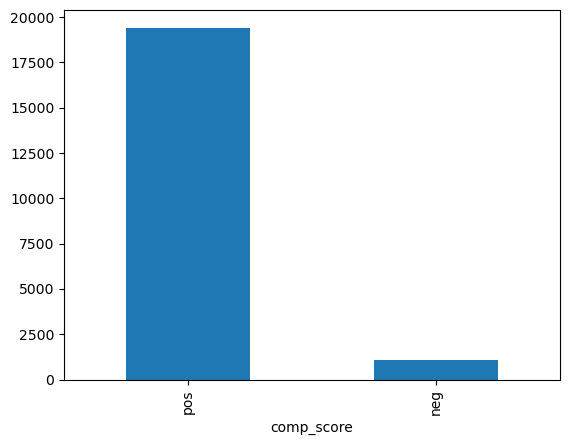

In [42]:
reviews['comp_score'].value_counts().plot(kind='bar')

In [43]:
# Printing the confusion matrix to understand true positives, false positives, true negatives, and false negatives
print(confusion_matrix(reviews['Label'],reviews['comp_score']))

[[ 1010  4388]
 [   55 15038]]


In [44]:
conf_matrix = confusion_matrix(reviews['Label'], reviews['comp_score'])

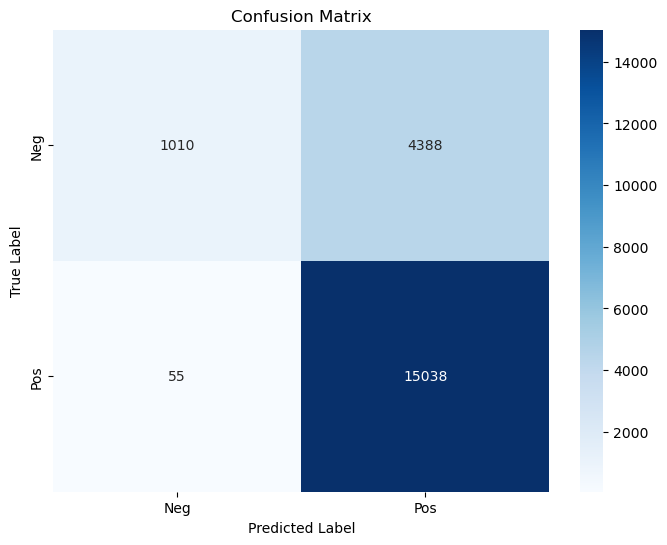

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Topic Modelling using LDA

In [46]:
# Importing CountVectorizer to convert text to word count vectors
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Configuring CountVectorizer with maximum and minimum document frequency for words and excluding English stop words
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words = 'english')

In [48]:
# Transforming the cleaned reviews into a document-term matrix (dtm)
dtm = cv.fit_transform(reviews['cleaned_review'])

In [49]:
dtm

<20491x21316 sparse matrix of type '<class 'numpy.int64'>'
	with 1485473 stored elements in Compressed Sparse Row format>

In [50]:
# Importing LDA for topic modeling
from sklearn.decomposition import LatentDirichletAllocation 

In [51]:
# Configuring LDA with 5 components (topics) and a random state for reproducibility
LDA = LatentDirichletAllocation(n_components = 5, random_state =40)

In [52]:
# Fitting the LDA model to the document-term matrix
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=40)

In [53]:
# Grab the vocabulary of words
# Grab the topics
# Grab the highest probability words per topic

In [54]:
# Getting the length of the vocabulary
len(cv.get_feature_names_out())

21316

In [55]:
type(cv.get_feature_names_out())

numpy.ndarray

In [56]:
cv.get_feature_names_out()[4500]

'coverlet'

In [57]:
# Randomly printing words from the vocabulary to understand the content
import random

In [59]:
for i in range(10):
    random_word_id = random.randint(0,21316)
    print(cv.get_feature_names_out()[random_word_id])

hairdrier
song
miles
controllable
estacion
mentally
jem
castillo
draughty
boozy


In [60]:
len(LDA.components_)

5

In [61]:
# Checking the shape of LDA components
LDA.components_.shape

(5, 21316)

In [62]:
type(LDA.components_)

numpy.ndarray

In [63]:
len(LDA.components_[0])

21316

In [64]:
LDA.components_[1]

array([5.19831346, 1.305628  , 0.20160268, ..., 3.58501385, 4.19999355,
       0.20019722])

In [65]:
# at this point we have the cabability to grab the highest probability words per topic
#by combining LDA.components_   
# and the ability to grab vocabulary ( cv.get_feature_names() )


In [66]:
# Lets' grab a single topic
single_topic = LDA.components_[0]

In [67]:
# Sorting the indexes of words in single_topic based on their contribution
single_topic.argsort()

array([19983,  5124,  9979, ...,  1751, 15690,  8294])

In [68]:
#----------------------single_topic.argsort()  explained
import numpy as np
arr = np.array([10, 200, 1])


In [69]:
arr.argsort()

array([2, 0, 1])

In [73]:
single_topic[21315]

4.197729047081501

In [74]:
#Argsort ----> INDEX POSITIONS SORTED FROM LEAST ---> GREATEST
#Top 10 VALUES (10 GREATEST VALUES )
# LAST 10 VALUES of ARGSORT()

single_topic.argsort()[-10:]  # Grab the last 10 values of .argsort()

array([ 9115, 19064, 16063,  7415, 17794, 17905, 14283,  1751, 15690,
        8294])

In [75]:
top_word_indices = single_topic.argsort()[-10:]

In [76]:
# The above represents the index position of the top highest 10 probability 
#words for the "single_topic"

In [77]:
# Printing the top words for the single topic
for index in top_word_indices:
    print(cv.get_feature_names_out()[index])

hotel
time
room
food
staff
stay
pool
beach
resort
great


In [78]:
# To view 10 topics found
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['hotel', 'time', 'room', 'food', 'staff', 'stay', 'pool', 'beach', 'resort', 'great']


THE TOP 10 WORDS FOR TOPIC #1
['clean', 'walk', 'breakfast', 'staff', 'good', 'location', 'great', 'stay', 'room', 'hotel']


THE TOP 10 WORDS FOR TOPIC #2
['people', 'great', 'pool', 'time', 'room', 'day', 'food', 'good', 'resort', 'beach']


THE TOP 10 WORDS FOR TOPIC #3
['night', 'desk', 'time', 'bed', 'tell', 'stay', 'day', 'service', 'hotel', 'room']


THE TOP 10 WORDS FOR TOPIC #4
['nice', 'great', 'time', 'check', 'staff', 'night', 'service', 'stay', 'room', 'hotel']




In [79]:
dtm.shape

(20491, 21316)

In [80]:
# Transforming the document-term matrix to get the topic results (topic distribution for each document)
topic_results = LDA.transform(dtm)

In [81]:
topic_results.shape

(20491, 5)

In [82]:
topic_results[0].argmax()

4

In [83]:
topic_results[1].argmax()

4

In [84]:
# Assigning the most dominant topic to each review in the dataframe
reviews['Topic'] = topic_results.argmax(axis=1)

In [85]:
reviews.head(20)

Review  Rating Label  \
0   nice hotel expensive parking got good deal sta...       4   pos   
1   ok nothing special charge diamond member hilto...       2   neg   
2   nice rooms not 4* experience hotel monaco seat...       3   neg   
3   unique, great stay, wonderful time hotel monac...       5   pos   
4   great stay great stay, went seahawk game aweso...       5   pos   
5   love monaco staff husband stayed hotel crazy w...       5   pos   
6   cozy stay rainy city, husband spent 7 nights m...       5   pos   
7   excellent staff, housekeeping quality hotel ch...       4   pos   
8   hotel stayed hotel monaco cruise, rooms genero...       5   pos   
9   excellent stayed hotel monaco past w/e delight...       5   pos   
10  poor value stayed monaco seattle july, nice ho...       2   neg   
11  nice value seattle stayed 4 nights late 2007. ...       4   pos   
12  nice hotel good location hotel kimpton design ...       4   pos   
13  nice hotel not nice staff hotel lovely staff q...       3   neg   
14  great hotel night quick business trip, loved l...       4   pos   
15  horrible customer service hotel stay february ...       1   neg   
16  disappointed say anticipating stay hotel monac...       2   neg   
17  fantastic stay monaco seattle hotel monaco hol...       5   pos   
18  good choice hotel recommended sister, great lo...       5   pos   
19  hmmmmm say really high hopes hotel monaco chos...       3   neg   

                                         Clean_Review  \
0   nice hotel expensive parking get good deal sta...   
1   ok nothing special charge diamond member hilto...   
2   nice room not experience hotel monaco seattle ...   
3   unique great stay wonderful time hotel monaco ...   
4   great stay great stay go seahawk game awesome ...   
5   love monaco staff husband stay hotel crazy wee...   
6   cozy stay rainy city husband spend night monac...   
7   excellent staff housekeep quality hotel chock ...   
8   hotel stay hotel monaco cruise room generous d...   
9   excellent stay hotel monaco past w/e delight r...   
10  poor value stay monaco seattle july nice hotel...   
11  nice value seattle stayed night late look comp...   
12  nice hotel good location hotel kimpton design ...   
13  nice hotel not nice staff hotel lovely staff q...   
14  great hotel night quick business trip love lit...   
15  horrible customer service hotel stay february ...   
16  disappointed say anticipate stay hotel monaco ...   
17  fantastic stay monaco seattle hotel monaco hol...   
18  good choice hotel recommend sister great locat...   
19  hmmmmm say really high hope hotel monaco chose...   

                                       cleaned_review  \
0   nice hotel expensive parking get good deal sta...   
1   ok nothing special charge diamond member hilto...   
2   nice room experience hotel monaco seattle good...   
3   unique great stay wonderful time hotel monaco ...   
4   great stay great stay go seahawk game awesome ...   
5   love monaco staff husband stay hotel crazy wee...   
6   cozy stay rainy city husband spend night monac...   
7   excellent staff housekeep quality hotel chock ...   
8   hotel stay hotel monaco cruise room generous d...   
9   excellent stay hotel monaco past w/e delight r...   
10  poor value stay monaco seattle july nice hotel...   
11  nice value seattle stayed night late look comp...   
12  nice hotel good location hotel kimpton design ...   
13  nice hotel nice staff hotel lovely staff quite...   
14  great hotel night quick business trip love lit...   
15  horrible customer service hotel stay february ...   
16  disappointed say anticipate stay hotel monaco ...   
17  fantastic stay monaco seattle hotel monaco hol...   
18  good choice hotel recommend sister great locat...   
19  hmmmmm say really high hope hotel monaco chose...   

                                               Scores  compound comp_score  \
0   {'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'co...    0.9808        pos   
1  

In [86]:
# Creating a dictionary to label topics meaningfully
mytopic_dict = {0: 'Hospitality', 1: 'Accomodation', 2: 'Experience', 3: 'Quality', 4: 'Location'}

In [87]:
# Mapping the topic labels onto the reviews
reviews['Topic Label'] = reviews['Topic'].map(mytopic_dict)
reviews.head()

Review  Rating Label  \
0  nice hotel expensive parking got good deal sta...       4   pos   
1  ok nothing special charge diamond member hilto...       2   neg   
2  nice rooms not 4* experience hotel monaco seat...       3   neg   
3  unique, great stay, wonderful time hotel monac...       5   pos   
4  great stay great stay, went seahawk game aweso...       5   pos   

                                        Clean_Review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room not experience hotel monaco seattle ...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                      cleaned_review  \
0  nice hotel expensive parking get good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice room experience hotel monaco seattle good...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay go seahawk game awesome ...   

                                              Scores  compound comp_score  \
0  {'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'co...    0.9808        pos   
1  {'neg': 0.063, 'neu': 0.687, 'pos': 0.25, 'com...    0.9945        pos   
2  {'neg': 0.053, 'neu': 0.706, 'pos': 0.241, 'co...    0.9925        pos   
3  {'neg': 0.044, 'neu': 0.557, 'pos': 0.398, 'co...    0.9919        pos   
4  {'neg': 0.099, 'neu': 0.639, 'pos': 0.262, 'co...    0.9914        pos   

   Topic   Topic Label  
0      4      Location  
1      4      Location  
2      3       Quality  
3      1  Accomodation  
4      4      Location

# Visualizations

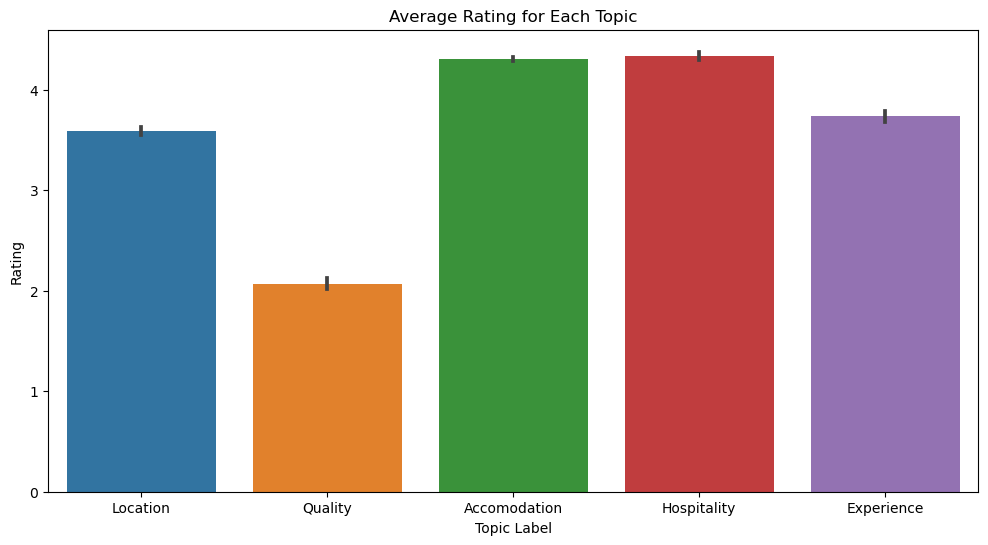

In [88]:
# Visualizing the average rating for each topic
plt.figure(figsize=(12, 6))

sns.barplot(x='Topic Label', y='Rating', data=reviews, estimator=np.mean)

plt.title('Average Rating for Each Topic')

plt.show()

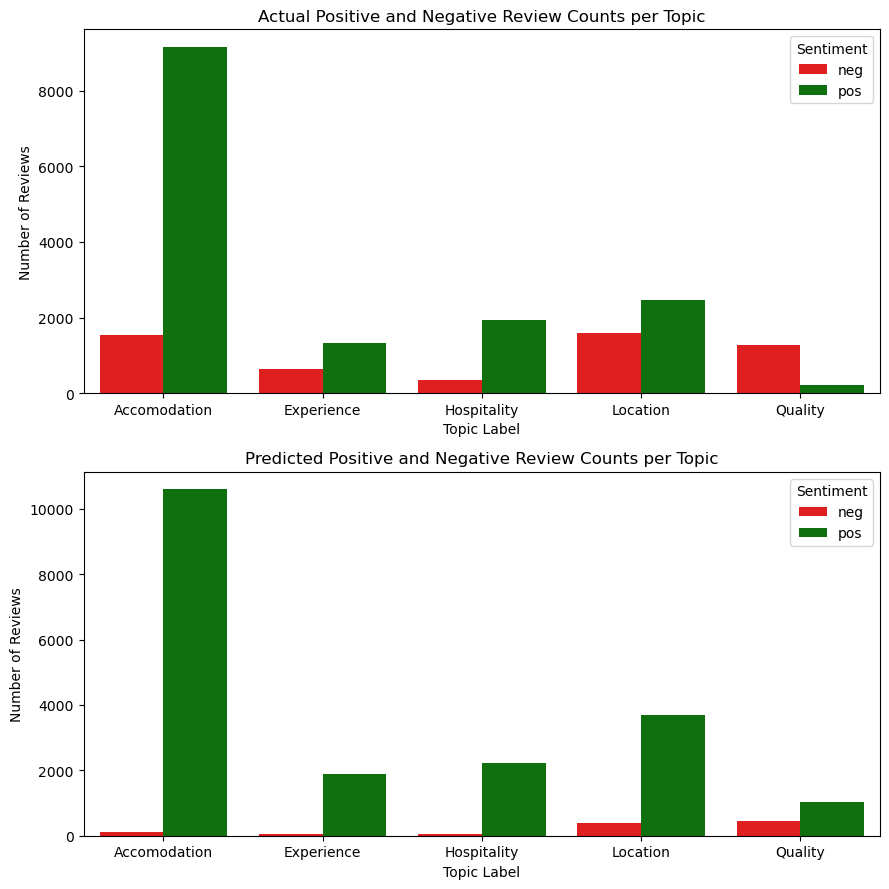

In [89]:
# Grouping reviews by topic label and actual sentiment label to count the number of reviews
topic_sentiment_count_actual = reviews.groupby('Topic Label')['Label'].value_counts().unstack(fill_value=0).reset_index().melt(
    id_vars="Topic Label", 
    var_name="Sentiment", 
    value_name="Number of Reviews"
)
# Grouping reviews by topic label and predicted sentiment label to count the number of reviews
topic_sentiment_count_predicted = reviews.groupby('Topic Label')['comp_score'].value_counts().unstack(fill_value=0).reset_index().melt(
    id_vars="Topic Label", 
    var_name="Sentiment", 
    value_name="Number of Reviews"
)
# Creating bar plots to show actual and predicted positive and negative review counts per topic
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

sns.barplot(x='Topic Label', y='Number of Reviews', hue='Sentiment', 
            data=topic_sentiment_count_actual, estimator=np.mean, palette={'pos': 'green', 'neg': 'red'}, ax=axes[0])
axes[0].set_title('Actual Positive and Negative Review Counts per Topic')

sns.barplot(x='Topic Label', y='Number of Reviews', hue='Sentiment', 
            data=topic_sentiment_count_predicted, estimator=np.mean, palette={'pos': 'green', 'neg': 'red'}, ax=axes[1])
axes[1].set_title('Predicted Positive and Negative Review Counts per Topic')

plt.tight_layout()
plt.show()

